Importing the necessary libraries and modules

In [1]:
import pandas as pd
import os
import yfinance as yf
from matplotlib import pyplot as plt
from dotenv import load_dotenv
import smtplib
from email.message import EmailMessage

Fetching stocks data via Yahoo Finance

In [2]:
stock_names = ["^BVSP", "KLBN3.SA"]
stock_data = yf.download(stock_names, period="2y")

[*********************100%***********************]  2 of 2 completed


Cleaning, grouping and calculating specifics % returns from the data

In [3]:
stock_data = stock_data['Close'].dropna()
stock_data.columns = ['klabin', 'ibovespa']

yearly_returns = stock_data.pct_change(periods=365).dropna()
monthly_returns = stock_data.pct_change(periods=30).dropna()
daily_returns = stock_data.pct_change().dropna()

daily_klabin = round(daily_returns.iloc[-1, 0]*100, 2)
daily_ibovespa = round(daily_returns.iloc[-1, 1]*100, 2)

monthly_klabin = round(monthly_returns.iloc[-1, 0]*100, 2)
monthly_ibovespa = round(monthly_returns.iloc[-1, 1]*100, 2)

yearly_klabin = round(yearly_returns.iloc[-1, 0]*100, 2)
yearly_ibovespa = round(yearly_returns.iloc[-1, 1]*100, 2)

if daily_klabin < daily_ibovespa:
    conclusion = f"A Klabin performou inferiormente a média do mercado, por uma diferença de {round(abs(daily_klabin - daily_ibovespa), 2)}"
else: 
    conclusion = f"A Klabin performou superiormente a média do mercado, por uma diferença de {round(abs(daily_klabin - daily_ibovespa), 2)}"

Plotting the graphs

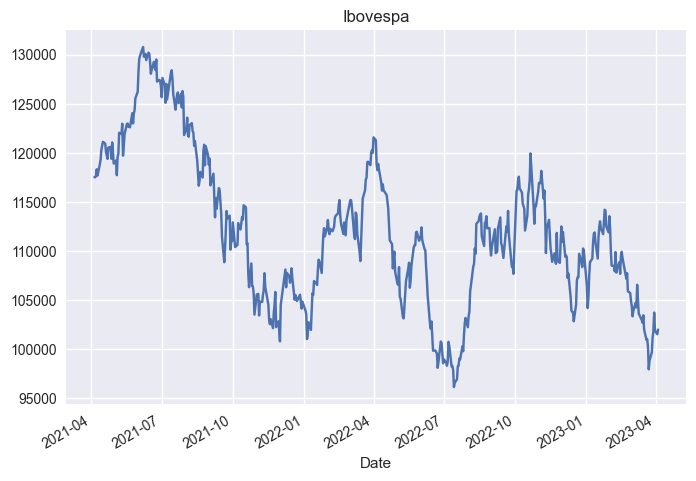

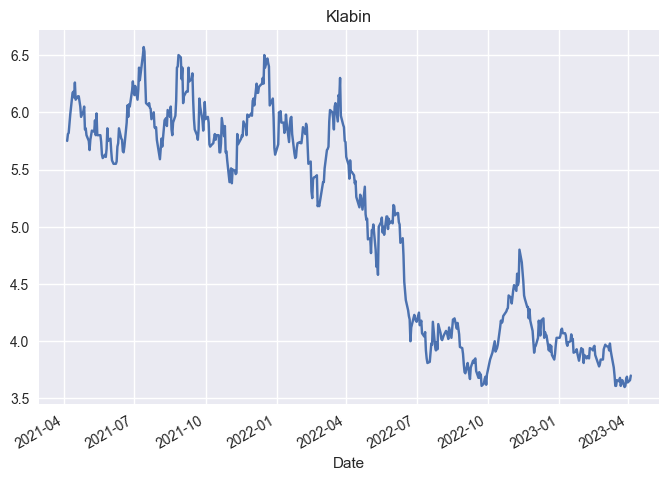

In [4]:
plt.style.use("seaborn")
stock_data.plot(y = 'ibovespa', use_index = True, legend = False)
plt.title("Ibovespa")
plt.savefig('ibovespa.png', dpi = 300)

plt.style.use("seaborn")
stock_data.plot(y = 'klabin', use_index = True, legend = False)
plt.title("Klabin")
plt.savefig('klabin.png', dpi = 300)

Sending the email

In [7]:
load_dotenv()

email = "devgabrielmesquita@gmail.com"
password = os.environ.get("password")

msg = EmailMessage()
msg['Subject'] = "Análise de desempenho da Klabin 3"
msg['From'] = 'devgabrielmesquita@gmail.com'
msg['To'] = 'devgabrielmesquita@gmail.com'
msg.set_content(f'''Prezado destinatário, segue o relatório diário:

Klabin:

A Klabin apresenta uma rentabilidade anual de {yearly_klabin}%, 
enquanto nos últimos 30 dias a rentabilidade é de {monthly_klabin}%.
No último dia útil, o fechamento foi de {daily_klabin}%.


Rentabilidade Ibovespa:

Anual: {yearly_ibovespa}%, 
Mensal: {monthly_ibovespa}%.
Diária: {daily_ibovespa}%.


Conclusão: {conclusion}%


Saudações,
Gabriel Mesquita
''')

with open('ibovespa.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='ibovespa.png')

with open('klabin.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='klabin.png')    
    
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    smtp.login(email, password)
    smtp.send_message(msg)

In [6]:
print('Eviou')

Eviou
